In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df['Gender'].replace(['Male','Female'],[0,1], inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [6]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [7]:
x = df[['User ID','Gender','Age','EstimatedSalary']]
y = df['Purchased']

In [8]:
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
x_train

,User ID,Gender,Age,EstimatedSalary
336,15664907,0,58,144000
64,15605000,1,59,83000
55,15649136,1,24,55000
106,15706185,1,26,35000
300,15736397,1,58,38000
...,...,...,...,...
323,15619465,1,48,30000
192,15779581,0,29,43000
117,15591433,0,36,52000
47,15776348,1,27,54000


In [10]:
x_test

,User ID,Gender,Age,EstimatedSalary
132,15725660,0,30,87000
309,15652400,1,38,50000
341,15776844,0,35,75000
196,15738448,1,30,79000
246,15638003,1,35,50000
...,...,...,...,...
14,15628972,0,18,82000
363,15768293,1,42,79000
304,15598070,1,40,60000
361,15778830,1,53,34000


In [11]:
y_train

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [12]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [13]:
import matplotlib.pyplot as plt

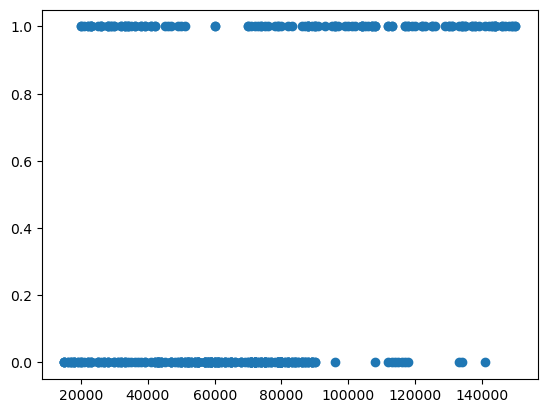

In [14]:
plt.scatter(df['EstimatedSalary'], df['Purchased'])

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg=LogisticRegression()

In [17]:
model = lg.fit(x_train,y_train)
model

LogisticRegression()

In [18]:
y_pred=lg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [19]:
lg.score(x_test,y_test)

0.825

In [20]:
import sklearn.metrics as sm

In [21]:
sm.accuracy_score(y_test,y_pred)

0.825

In [25]:
import matplotlib.pyplot as plt
import numpy 

In [28]:
confusion_matrix = sm.confusion_matrix(y_test,y_pred)

confusion_matrix

array([[56,  2],
       [12, 10]], dtype=int64)

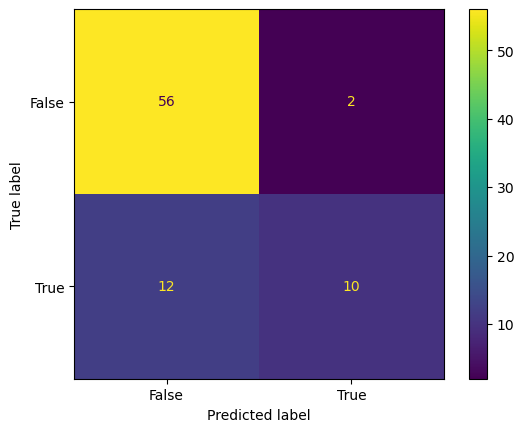

In [30]:
actual = y_test
predicted = y_pred

confusion_matrix = sm.confusion_matrix(actual, predicted)

cm_display = sm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])

cm_display.plot()
plt.show()

In [31]:
tn,fp,fn,tp=confusion_matrix.ravel()
tn,fp,fn,tp

(56, 2, 12, 10)

In [32]:
precision=tp/(tp+fp)
precision

0.8333333333333334

In [34]:
recall=tp/(tp+fn)
recall

0.45454545454545453

In [35]:
Accuracy=(tp+tn)/(tp+fp+tn+fn)
print("Accuracy =", Accuracy*100)

Accuracy = 82.5


In [36]:
Error_rate=(fp+fn)/(tp+fp+fn+tn)
Error_rate

0.175

In [37]:
from sklearn.metrics import classification_report

In [38]:
matrix=classification_report(y_test,y_pred)
print("\n",matrix)


               precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



In [ ]:
class Perceptron:
    def __init__(self,input_size):
        self.weights